In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv("lung.csv")

In [4]:
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  228 non-null    int64  
 1   inst        227 non-null    float64
 2   time        228 non-null    int64  
 3   status      228 non-null    int64  
 4   age         228 non-null    int64  
 5   sex         228 non-null    int64  
 6   ph.ecog     227 non-null    float64
 7   ph.karno    227 non-null    float64
 8   pat.karno   225 non-null    float64
 9   meal.cal    181 non-null    float64
 10  wt.loss     214 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 19.7 KB


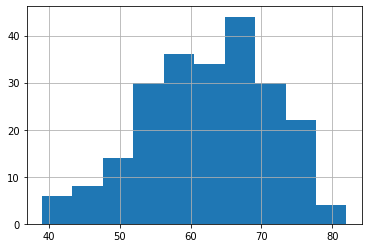

In [6]:
data["age"].hist()

In [18]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


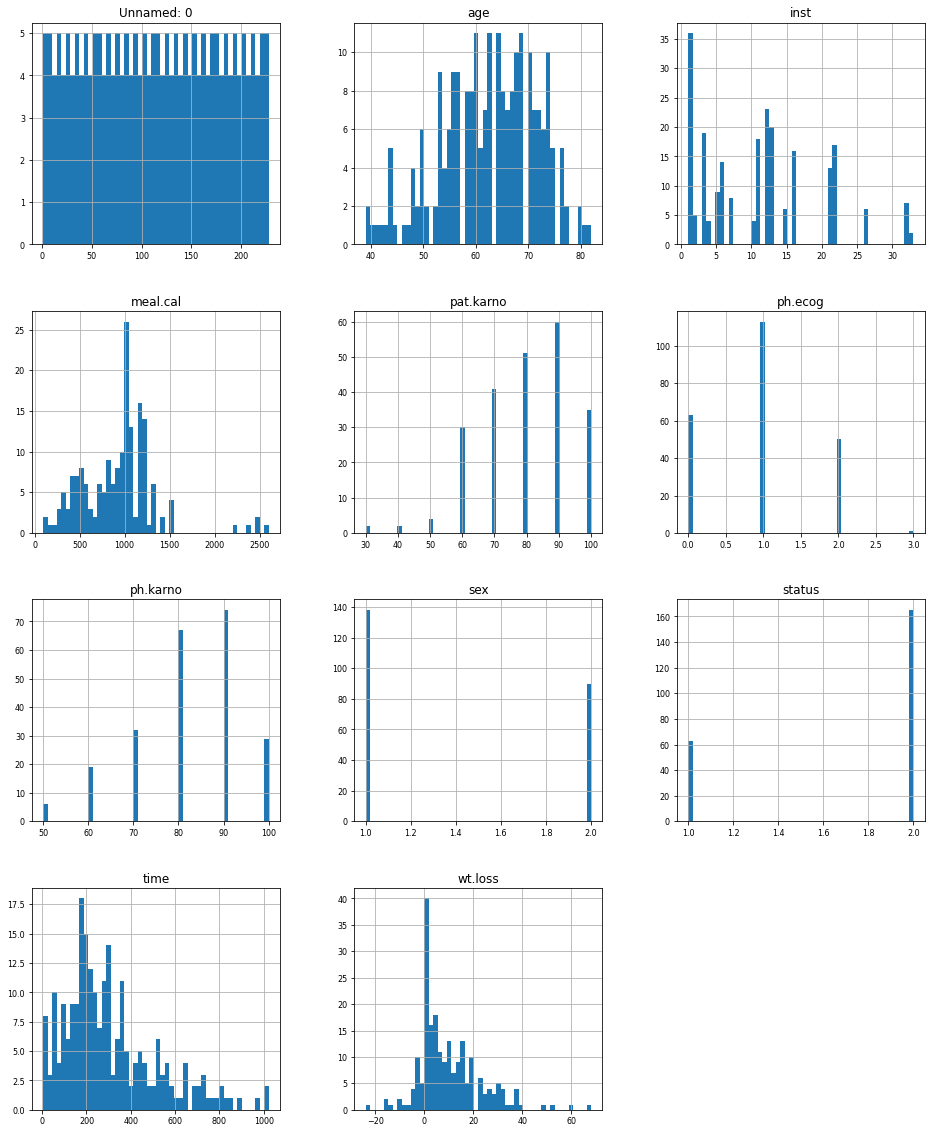

In [19]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

count    228.000000
mean      62.447368
std        9.073457
min       39.000000
25%       56.000000
50%       63.000000
75%       69.000000
max       82.000000
Name: age, dtype: float64


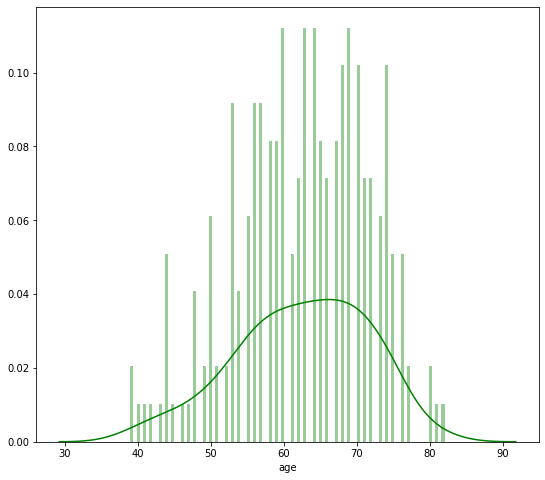

In [11]:
print(data['age'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['age'], color='g', bins=100, hist_kws={'alpha': 0.4});

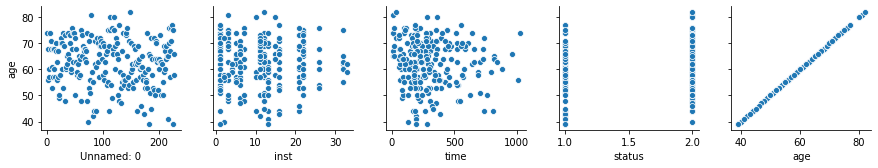

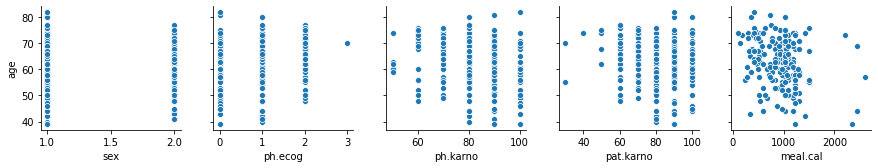

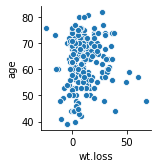

In [17]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['age'])

In [20]:
kmf = KaplanMeierFitter()

In [21]:
# Organize our data :
# If status = 1 , then dead = 0
# If status = 2 , then dead = 1
data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1
print (data.head())

   Unnamed: 0  inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  \
0           1   3.0   306       2   74    1      1.0      90.0      100.0   
1           2   3.0   455       2   68    1      0.0      90.0       90.0   
2           3   3.0  1010       1   56    1      0.0      90.0       90.0   
3           4   5.0   210       2   57    1      1.0      90.0       60.0   
4           5   1.0   883       2   60    1      0.0     100.0       90.0   

   meal.cal  wt.loss  dead  
0    1175.0      NaN   1.0  
1    1225.0     15.0   1.0  
2       NaN     15.0   0.0  
3    1150.0     11.0   1.0  
4       NaN      0.0   1.0  


In [22]:
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN,1.0
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0,1.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0,0.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0,1.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0,1.0
